In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [3]:
#loading the train and test dataset
train = pd.read_csv("Housing_dataset_train.csv")
test = pd.read_csv("Housing_dataset_test.csv")
print(train.head())
print(test.head())

      ID      loc                 title  bedroom  bathroom  parking_space  \
0   3583  Katsina  Semi-detached duplex      2.0       2.0            1.0   
1   2748     Ondo             Apartment      NaN       2.0            4.0   
2   9261    Ekiti                   NaN      7.0       5.0            NaN   
3   2224  Anambra       Detached duplex      5.0       2.0            4.0   
4  10300     Kogi        Terrace duplex      NaN       5.0            6.0   

         price  
0  1149999.565  
1  1672416.689  
2  3364799.814  
3  2410306.756  
4  2600700.898  
      ID      loc                 title  bedroom  bathroom  parking_space
0    845     Kano             Penthouse        4         1              2
1   1924  Adamawa             Apartment        2         2              4
2  10718  Adamawa              Bungalow        2         7              2
3  12076    Lagos               Mansion        9         5              2
4  12254    Gombe  Semi-detached duplex        5         6       

In [4]:
#displaying the number of rows and columns of the train and test dataset
print(train.shape)
print(test.shape)

(14000, 7)
(6000, 6)


In [5]:
#displaying the information on the train and test dataset
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  

In [6]:
#displaying the summary statistics of the train and test dataset
print(train.describe())
print(test.describe())

                 ID       bedroom      bathroom  parking_space         price
count  14000.000000  12201.000000  12195.000000   12189.000000  1.400000e+04
mean    4862.700357      4.308171      3.134235       3.169825  2.138082e+06
std     3818.348214      2.441165      2.035950       1.599415  1.083057e+06
min        0.000000      1.000000      1.000000       1.000000  4.319673e+05
25%     1672.750000      2.000000      1.000000       2.000000  1.393990e+06
50%     3527.000000      4.000000      2.000000       3.000000  1.895223e+06
75%     8011.250000      6.000000      5.000000       4.000000  2.586699e+06
max    12999.000000      9.000000      7.000000       6.000000  1.656849e+07
                 ID      bedroom     bathroom  parking_space
count   6000.000000  6000.000000  6000.000000    6000.000000
mean    4818.699167     4.329833     3.105667       3.132333
std     3832.336902     2.454733     2.033189       1.604551
min        2.000000     1.000000     1.000000       1.000000
25

In [7]:
#checking for missing values in the train and test datsets
print(train.isnull().sum())
print(test.isnull().sum())

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64
ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64


In [8]:
#displaying the columns in the train and test datset
print(train.columns)
print(test.columns)

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')
Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space'], dtype='object')


In [9]:
#dropping the ID column in the train and test datset since it is not necessary
train.drop(columns = ["ID"], axis=1, inplace=True)
test.drop(columns= ["ID"], axis=1, inplace = True)

In [10]:
#displaying the number of unique values in the location column
print(train["loc"].nunique())
print(test["loc"].nunique())

36
36


In [11]:
#displaying the number of unique values in the title column
print(train["title"].nunique())
print(test["title"].nunique())

10
10


### Exploratory Data Analysis

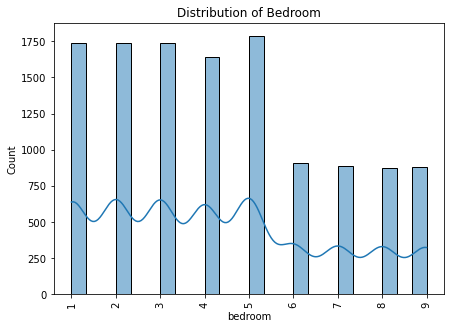

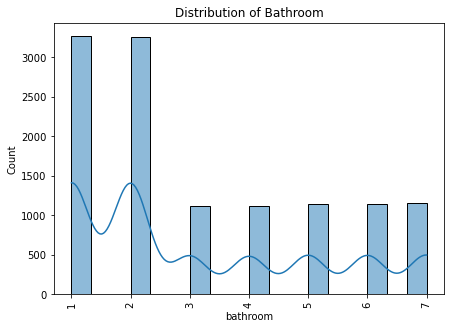

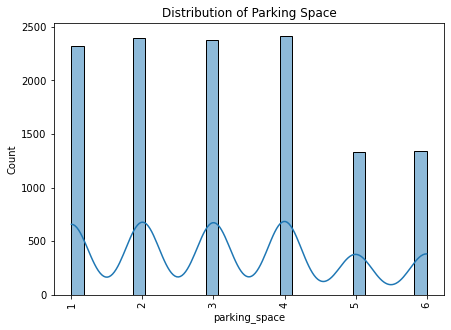

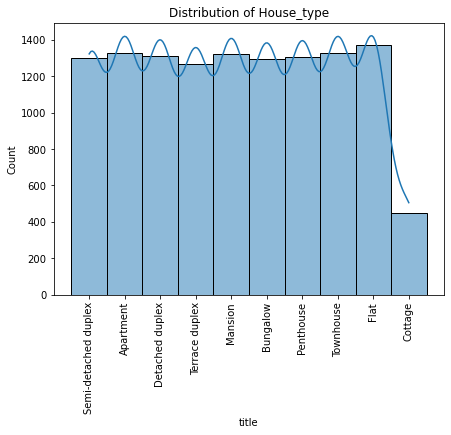

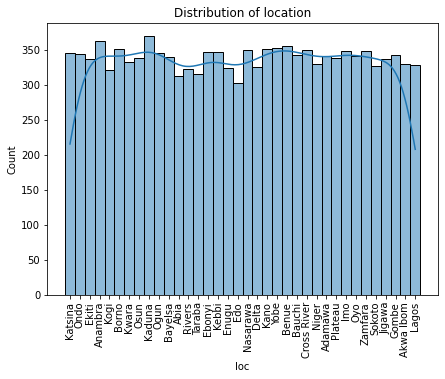

In [12]:
#Distribution of house type
columns = ["bedroom", "bathroom", "parking_space", "title", "loc"]
title_list = ["Distribution of Bedroom",
              "Distribution of Bathroom",
              "Distribution of Parking Space",
              "Distribution of House_type",
              "Distribution of location"]
for col in range(len(columns)):
  plt.figure(figsize=(7,5))
  sns.histplot(train[columns[col]], kde=True)
  plt.xticks(rotation = 90)
  plt.title(title_list[col]);

In [14]:
#State with highest number of houses
house_type_by_state = train.groupby(["loc"])["title"].count().sort_values(ascending = False)
house_type_by_state.head()

loc
Cross River    317
Imo            311
Anambra        310
Benue          309
Kaduna         309
Name: title, dtype: int64

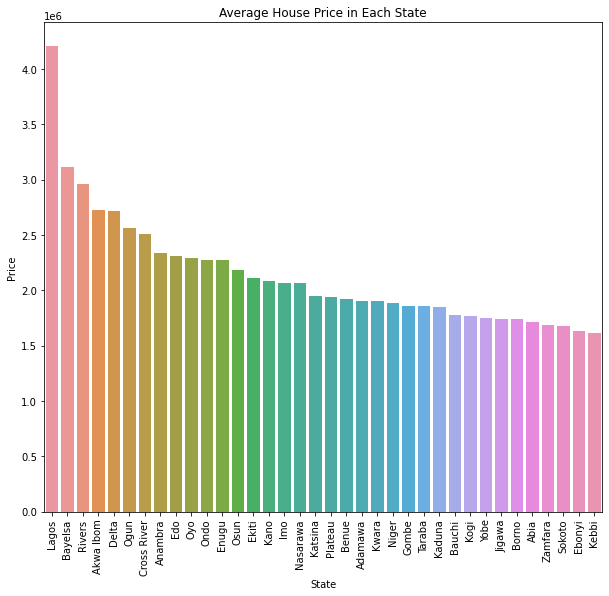

In [16]:
#Average house price in each state
average_price_by_state = train.groupby(["loc"])["price"].mean().reset_index()
average_price_by_state_sorted = average_price_by_state.sort_values(by= "price", ascending=False)
#visualizing
plt.figure(figsize=(10,9))
sns.barplot(data = average_price_by_state_sorted, x= "loc", y="price")
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Price")
plt.title("Average House Price in Each State")
plt.savefig("avg_hsp_by_state.png");

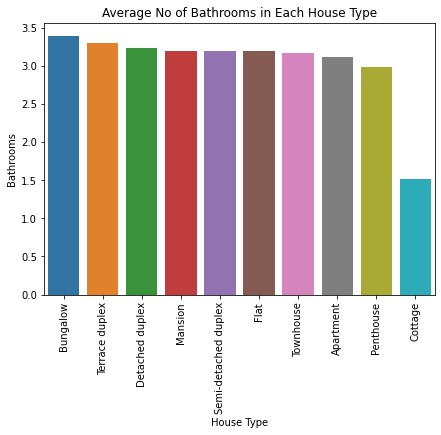

In [15]:
#Average number of bathroom based on house type
average_bathrooms_by_housetype = train.groupby("title")["bathroom"].mean().reset_index()
average_bathrooms_by_housetype_sorted = average_bathrooms_by_housetype.sort_values(by= "bathroom", ascending=False)
#visualizing
plt.figure(figsize=(7,5))
sns.barplot(data = average_bathrooms_by_housetype_sorted, x= "title", y="bathroom")
plt.xticks(rotation = 90)
plt.xlabel("House Type")
plt.ylabel("Bathrooms")
plt.title("Average No of Bathrooms in Each House Type");

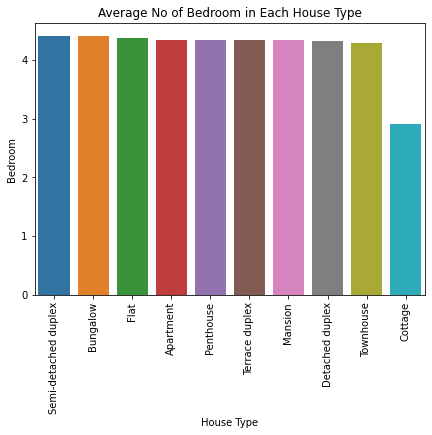

In [17]:
#Average number of bedroom based on house type
average_bedroom_by_housetype = train.groupby("title")["bedroom"].mean().reset_index()
average_bedroom_by_housetype_sorted = average_bedroom_by_housetype.sort_values(by= "bedroom", ascending=False)
#visualizing
plt.figure(figsize=(7,5))
sns.barplot(data = average_bedroom_by_housetype_sorted, x= "title", y="bedroom")
plt.xticks(rotation = 90)
plt.xlabel("House Type")
plt.ylabel("Bedroom")
plt.title("Average No of Bedroom in Each House Type");

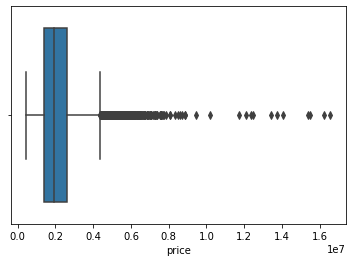

In [18]:
#Checking for outliers inthe price column
sns.boxplot(x =train["price"]);

### Bivariate Analysis

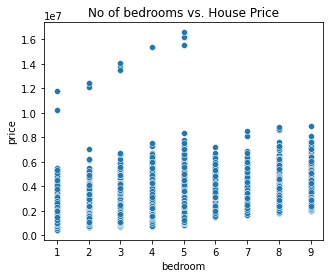

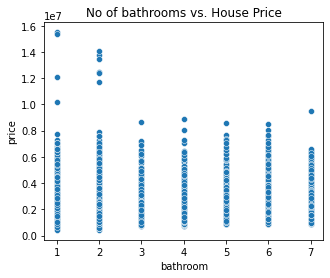

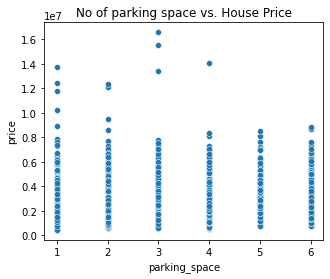

In [19]:
#Relationship between continuous features and target variable(Price)
num_cols = ["bedroom", "bathroom", "parking_space"]
titles = ["No of bedrooms vs. House Price", "No of bathrooms vs. House Price", "No of parking space vs. House Price"]
for col in range(len(num_cols)):
  plt.figure(figsize=(5,4))
  sns.scatterplot(data= train, x=num_cols[col], y=train["price"])
  plt.title(titles[col]);

In [20]:
#State with the highest median price
median_price_by_state = train.groupby("loc")["price"].median()
median_price_by_state.sort_values(ascending=False).head()

loc
Lagos        3845225.673
Bayelsa      2844060.341
Rivers       2569029.764
Akwa Ibom    2505119.860
Delta        2401926.119
Name: price, dtype: float64

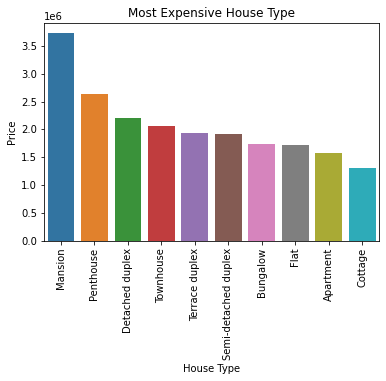

In [21]:
#Most expensive house type
mean_price_by_title = train.groupby("title")["price"].mean().reset_index().sort_values(by= "price", ascending=False)
#visualizing
sns.barplot(data=mean_price_by_title, x="title", y="price")
plt.xticks(rotation= 90)
plt.xlabel("House Type")
plt.ylabel("Price")
plt.title("Most Expensive House Type")
plt.savefig("most_exp.png");

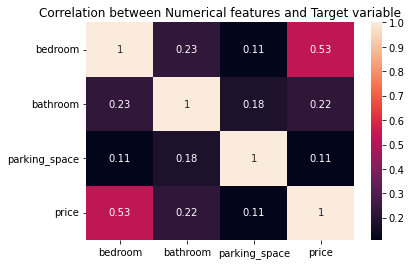

In [22]:
#displaying the correlation between tne contionous featu
train_corr = train.corr()
sns.heatmap(train_corr, annot=True)
plt.title("Correlation between Numerical features and Target variable")
plt.savefig("corr_plot.png")

### Preprocessing

In [23]:
#filling the missing values in the numeric column with the mean of each column
missing_cols = ["bedroom", "bathroom", "parking_space"]
for col in missing_cols:
  missing_cols_mean = train[col].mean()
  train[col].fillna(missing_cols_mean, inplace=True)

In [24]:
#filling the missing values in thr categorical column with the mode
loc_mode = train["loc"].mode()[0]
title_mode = train["title"].mode()[0]
train["loc"].fillna(loc_mode, inplace=True)
train["title"].fillna(title_mode, inplace=True)

In [25]:
#checking for null values
train.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

### Feature Engineering

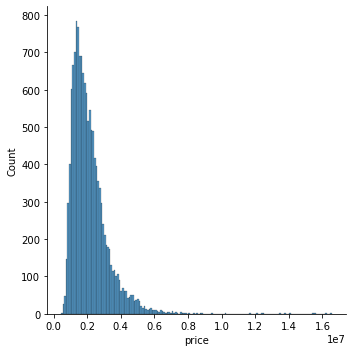

In [26]:
#visualizing the distribution of the price column
sns.displot(train["price"])
plt.savefig("before_sqrt.png");

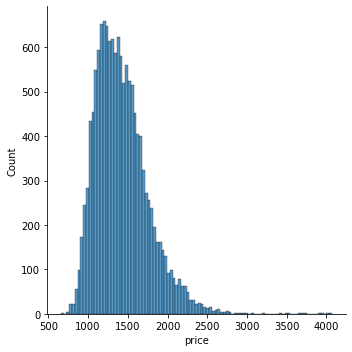

In [27]:
#Using square root transformation approch to normalize the data
train["price"] = np.sqrt(train["price"])
sns.displot(train["price"])
plt.savefig("after_sqrt.png")

In [28]:
#creating a new feature in the train and test dataset which is the ratio of num of bedrooms to num of bathrooms
train["bedroom/bathroom"] = train["bedroom"]/train["bathroom"]
test["bedroom/bathroom"] = test["bedroom"]/test["bathroom"]

In [29]:
#displaying thr number of new rows and columns of the train and test dataset
print(train.shape)
print(test.shape)

(14000, 7)
(6000, 6)


In [30]:
#Encoding the house type column
house_type = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
train["title"] = train["title"].map(house_type)
test["title"] = test["title"].map(house_type)

In [31]:
#encoding the location column using label encoder
le = LabelEncoder()
train["loc"] = le.fit_transform(train["loc"])
test["loc"] = le.transform(test["loc"])

### Machine learning

In [34]:
# Print the updated dataframe
print(train.head())
print(test.head())

   loc  title   bedroom  bathroom  parking_space        price  \
0   19      6  2.000000       2.0       1.000000  1072.380327   
1   27      9  4.308171       2.0       4.000000  1293.219505   
2   12      7  7.000000       5.0       3.169825  1834.339067   
3    3      5  5.000000       2.0       4.000000  1552.516266   
4   21      4  4.308171       5.0       6.000000  1612.668874   

   bedroom/bathroom  
0          1.000000  
1          2.154086  
2          1.400000  
3          2.500000  
4          0.861634  
   loc  title  bedroom  bathroom  parking_space  bedroom/bathroom
0   18      8        4         1              2          4.000000
1    1      9        2         2              4          1.000000
2    1      2        2         7              2          0.285714
3   23     10        9         5              2          1.800000
4   14      6        5         6              1          0.833333


In [35]:
#Splitting into features and target
X= train.drop(columns=["price"], axis=1)
y = train["price"]
print(X.shape)
print(y.shape)

(14000, 6)
(14000,)


In [36]:
#displaying the head of the features and target column
print(X.head())
print(y.head())

   loc  title   bedroom  bathroom  parking_space  bedroom/bathroom
0   19      6  2.000000       2.0       1.000000          1.000000
1   27      9  4.308171       2.0       4.000000          2.154086
2   12      7  7.000000       5.0       3.169825          1.400000
3    3      5  5.000000       2.0       4.000000          2.500000
4   21      4  4.308171       5.0       6.000000          0.861634
0    1072.380327
1    1293.219505
2    1834.339067
3    1552.516266
4    1612.668874
Name: price, dtype: float64


In [37]:
#Using the train test split function to split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [38]:
#displaying the shape of the X and y variables
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(14000, 6) (11200, 6) (2800, 6)
(14000,) (11200,) (2800,)


### Model Building

In [74]:
#setting the parameters
params = {
    "n_estimators": 1000,
    "random_state": 42,
    "learning_rate": 0.032, 
    "max_depth": 7
}

In [75]:
#Instantiating the model
model1 = LGBMRegressor(**params)
model2 = CatBoostRegressor(**params)

In [76]:
#ensembling the models
model = VotingRegressor(estimators=[("lgbm", model1), ("catboost", model2)])

In [77]:
#performimg KFold cross validation 
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

In [78]:
#instantiating an empty list to store the values of mse and rmse 
mse_scores = []
rmse_scores = []

In [79]:
for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [80]:
#fitting the ensembled model
model.fit(X_train, y_train)

0:	learn: 325.1618954	total: 10.4ms	remaining: 10.4s
1:	learn: 319.8760498	total: 16.1ms	remaining: 8.03s
2:	learn: 314.5021589	total: 25.9ms	remaining: 8.62s
3:	learn: 309.3910678	total: 31.4ms	remaining: 7.83s
4:	learn: 304.9189615	total: 42.7ms	remaining: 8.49s
5:	learn: 300.6802238	total: 48.9ms	remaining: 8.11s
6:	learn: 296.1011327	total: 58.5ms	remaining: 8.3s
7:	learn: 292.3111777	total: 63.8ms	remaining: 7.91s
8:	learn: 288.6465669	total: 73.7ms	remaining: 8.11s
9:	learn: 284.9563149	total: 79ms	remaining: 7.83s
10:	learn: 281.4943633	total: 89ms	remaining: 8s
11:	learn: 277.8045716	total: 95.3ms	remaining: 7.85s
12:	learn: 274.6403402	total: 105ms	remaining: 7.99s
13:	learn: 271.6251501	total: 111ms	remaining: 7.8s
14:	learn: 268.1294035	total: 120ms	remaining: 7.89s
15:	learn: 264.9586716	total: 126ms	remaining: 7.75s
16:	learn: 262.2708618	total: 137ms	remaining: 7.93s
17:	learn: 259.0745729	total: 143ms	remaining: 7.78s
18:	learn: 256.2168142	total: 151ms	remaining: 7.82s


VotingRegressor(estimators=[('lgbm',
                             LGBMRegressor(learning_rate=0.032, max_depth=7,
                                           n_estimators=1000,
                                           random_state=42)),
                            ('catboost',
                             <catboost.core.CatBoostRegressor object at 0x0000020898E669D0>)])

In [81]:
#making predictions on the X_test
y_pred = model.predict(X_test)

In [82]:
#getting the root mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [83]:
#saving the values in the empty list that was instantiated earlier
mse_scores.append(mse)
rmse_scores.append(rmse)

In [84]:
#getting the square of the rmse score because of the sqrt transformation that was performed on the price
mean_rmse = np.mean(rmse_scores)
print(np.square(mean_rmse))

25548.078883493847


In [85]:
#making predictions on the test dataset and also squaring the result
y_pred_test = model.predict(test)
y_pred_tests = np.square(y_pred_test)

In [86]:
#saving the predicted value in a dataframe
pred = pd.DataFrame({"price": y_pred_tests})
pred.head()

,price
0,2.357494e+06
1,1.022920e+06
2,1.222631e+06
3,8.595833e+06
4,1.888025e+06


In [87]:
#creating a feature in the submission dataset to store the predicted values
sub = pd.read_csv("Sample_submission.csv")
sub["price"] = pred["price"]
sub.head()

,ID,price
0,845,2.357494e+06
1,1924,1.022920e+06
2,10718,1.222631e+06
3,12076,8.595833e+06
4,12254,1.888025e+06


In [89]:
#converting it to a csv file for submission on zindi
sub.to_csv("sub43.csv", index = False)